In [1]:
!pip install opencv-python


In [2]:
pip install tensorflow

In [3]:
import os
import numpy as np
import cv2
from PIL import Image
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from transformers import ViTFeatureExtractor, TFViTForImageClassification
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [4]:
image_directory = '/content/drive/MyDrive/dataset/'
SIZE = 128
dataset, label = [], []

categories = ['acne', 'Milia', 'Dry', 'Oily', 'Wrinkles', 'Non Wrinkles', 'hyperpigmentation', 'Keratosis', 'Normal']

for idx, category in enumerate(categories):
    path = os.path.join(image_directory, category)
    for image_name in os.listdir(path):
        if image_name.lower().endswith(('.jpg', 'jpeg')):
            image = cv2.imread(os.path.join(path, image_name))
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = Image.fromarray(image).resize((SIZE, SIZE))
                dataset.append(np.array(image))
                label.append(idx)

dataset = np.array(dataset)
labels = np.array(label)

print(f"Dataset shape: {dataset.shape}")
print(f"Labels shape: {labels.shape}")

Dataset shape: (2810, 128, 128, 3)
Labels shape: (2810,)


<ipython-input-5-688ebc5321be>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=[label_to_class[i] for i in labels], order=categories, palette=colors)


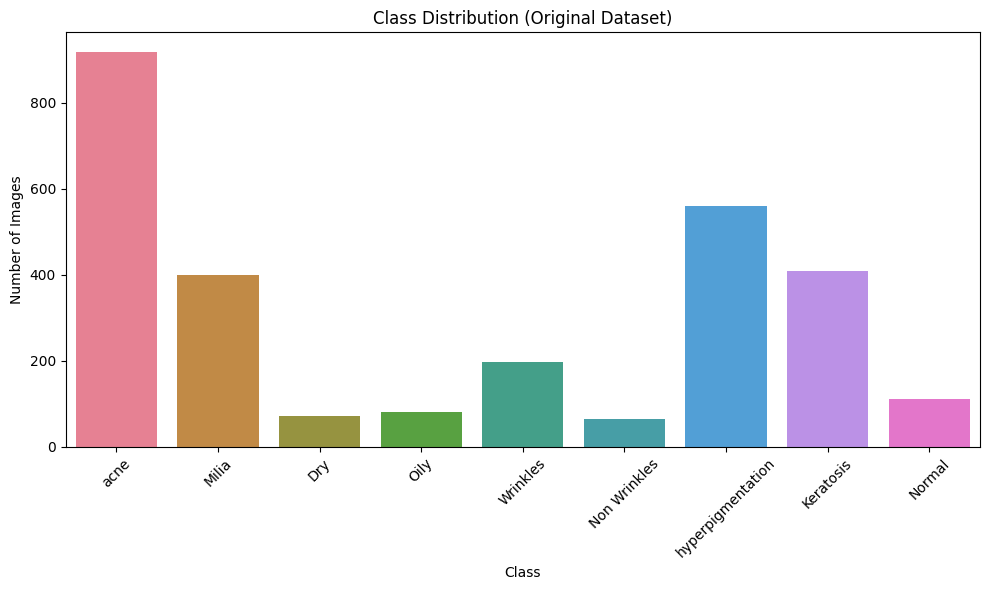


📊 Class-wise image counts:
acne: 918 images
Milia: 399 images
Dry: 71 images
Oily: 80 images
Wrinkles: 198 images
Non Wrinkles: 64 images
hyperpigmentation: 560 images
Keratosis: 409 images
Normal: 111 images


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter  # ✅ ADD THIS

# Prepare for plotting
label_to_class = {i: category for i, category in enumerate(categories)}
class_counts = Counter(labels)
colors = sns.color_palette("husl", len(categories))

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=[label_to_class[i] for i in labels], order=categories, palette=colors)
plt.title('Class Distribution (Original Dataset)')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print class-wise counts
print("\n📊 Class-wise image counts:")
for category, count in zip(categories, [class_counts[i] for i in range(len(categories))]):
    print(f"{category}: {count} images")


In [6]:
import numpy as np
import os
import cv2
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from collections import defaultdict
import shutil

# Set constants
TARGET_SIZE = 918  # Match the majority class count (acne)
AUGMENT_SIZE = TARGET_SIZE
AUGMENTED_DATA_DIR = '/content/drive/MyDrive/augmented_dataset3/'
os.makedirs(AUGMENTED_DATA_DIR, exist_ok=True)
'''
# Setup Data Generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    fill_mode='nearest'
)

# Dictionary to store images per class
images_by_class = defaultdict(list)

# Collect original images
for idx, category in enumerate(categories):
    path = os.path.join(image_directory, category)
    for image_name in os.listdir(path):
        if image_name.lower().endswith(('.jpg', '.jpeg')):  # ✅ fixed here
            image = cv2.imread(os.path.join(path, image_name))
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = Image.fromarray(image).resize((SIZE, SIZE))
                images_by_class[category].append(np.array(image))

# Augment classes with fewer than TARGET_SIZE images
for category in categories:
    images = images_by_class[category]
    n_images = len(images)

    print(f"\n{category}: {n_images} images")

    # Create directory for the augmented class
    save_dir = os.path.join(AUGMENTED_DATA_DIR, category)
    os.makedirs(save_dir, exist_ok=True)

    # Save original images
    #for i, img in enumerate(images):
        #Image.fromarray(img).save(os.path.join(save_dir, f'original_{i}.jpg'))

    # If images are below target, augment
    if n_images < TARGET_SIZE and n_images > 0:
        needed = TARGET_SIZE - n_images
        imgs_np = np.array(images)
        imgs_np = imgs_np.reshape((imgs_np.shape[0], SIZE, SIZE, 3))

        gen = datagen.flow(imgs_np, batch_size=1)
        for i in range(needed):
            augmented_img = next(gen)[0].astype(np.uint8)  # ✅ fixed here
            Image.fromarray(augmented_img).save(os.path.join(save_dir, f'augmented_{i}.jpg'))
import numpy as np
import os
import cv2
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from collections import defaultdict
import shutil

# Set constants
TARGET_SIZE = 918  # Match the majority class count (acne)
AUGMENT_SIZE = TARGET_SIZE
AUGMENTED_DATA_DIR = '/content/drive/MyDrive/augmented_dataset3/'
os.makedirs(AUGMENTED_DATA_DIR, exist_ok=True)

"""
# Setup Data Generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    fill_mode='nearest'
)

# Dictionary to store images per class
images_by_class = defaultdict(list)

# Collect original images
for idx, category in enumerate(categories):
    path = os.path.join(image_directory, category)
    for image_name in os.listdir(path):
        if image_name.lower().endswith(('.jpg', '.jpeg')):  # ✅ fixed here
            image = cv2.imread(os.path.join(path, image_name))
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = Image.fromarray(image).resize((SIZE, SIZE))
                images_by_class[category].append(np.array(image))

# Augment classes with fewer than TARGET_SIZE images
for category in categories:
    images = images_by_class[category]
    n_images = len(images)

    print(f"\n{category}: {n_images} images")

    # Create directory for the augmented class
    save_dir = os.path.join(AUGMENTED_DATA_DIR, category)
    os.makedirs(save_dir, exist_ok=True)

    # Save original images
    #for i, img in enumerate(images):
        #Image.fromarray(img).save(os.path.join(save_dir, f'original_{i}.jpg'))

    # If images are below target, augment
    if n_images < TARGET_SIZE and n_images > 0:
        needed = TARGET_SIZE - n_images
        imgs_np = np.array(images)
        imgs_np = imgs_np.reshape((imgs_np.shape[0], SIZE, SIZE, 3))

        gen = datagen.flow(imgs_np, batch_size=1)
        for i in range(needed):
            augmented_img = next(gen)[0].astype(np.uint8)  # ✅ fixed here
            Image.fromarray(augmented_img).save(os.path.join(save_dir, f'augmented_{i}.jpg'))

    elif n_images == 0:
        print(f"⚠️ No images found for class: {category} — skipping.")

# ✅ Print augmented image counts
print("\n📈 Augmented Image Counts Per Class:")
for category in categories:
    class_dir = os.path.join(AUGMENTED_DATA_DIR, category)
    if os.path.exists(class_dir):
        augmented_images = [f for f in os.listdir(class_dir)
                            if f.startswith('augmented_') and f.lower().endswith(('.jpg', '.jpeg'))]
        print(f"{category}: {len(augmented_images)} augmented images")
    else:
        print(f"{category}: directory not found")
"""

    elif n_images == 0:
        print(f"⚠️ No images found for class: {category} — skipping.")

# ✅ Print augmented image counts
print("\n📈 Augmented Image Counts Per Class:")
for category in categories:
    class_dir = os.path.join(AUGMENTED_DATA_DIR, category)
    if os.path.exists(class_dir):
        augmented_images = [f for f in os.listdir(class_dir)
                            if f.startswith('augmented_') and f.lower().endswith(('.jpg', '.jpeg'))]
        print(f"{category}: {len(augmented_images)} augmented images")
    else:
        print(f"{category}: directory not found")
'''

'\n# Setup Data Generator\ndatagen = ImageDataGenerator(\n    rotation_range=20,\n    width_shift_range=0.1,\n    height_shift_range=0.1,\n    horizontal_flip=True,\n    zoom_range=0.1,\n    fill_mode=\'nearest\'\n)\n\n# Dictionary to store images per class\nimages_by_class = defaultdict(list)\n\n# Collect original images\nfor idx, category in enumerate(categories):\n    path = os.path.join(image_directory, category)\n    for image_name in os.listdir(path):\n        if image_name.lower().endswith((\'.jpg\', \'.jpeg\')):  # ✅ fixed here\n            image = cv2.imread(os.path.join(path, image_name))\n            if image is not None:\n                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)\n                image = Image.fromarray(image).resize((SIZE, SIZE))\n                images_by_class[category].append(np.array(image))\n\n# Augment classes with fewer than TARGET_SIZE images\nfor category in categories:\n    images = images_by_class[category]\n    n_images = len(images)\n\n   

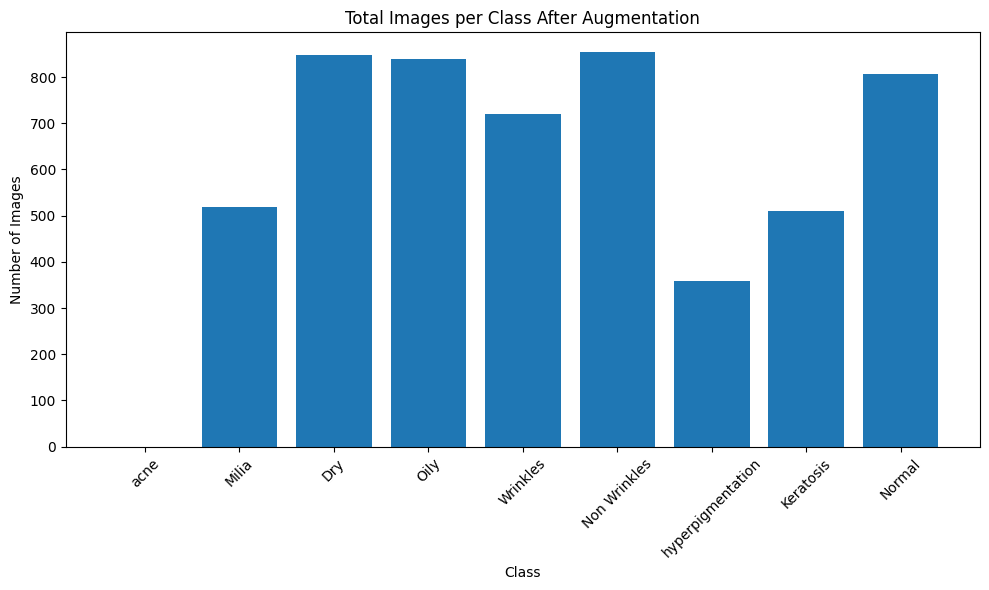

In [7]:
import matplotlib.pyplot as plt

# Count total images per class after augmentation
class_counts = {}

for category in categories:
    class_dir = os.path.join(AUGMENTED_DATA_DIR, category)
    if os.path.exists(class_dir):
        total_images = len([
            f for f in os.listdir(class_dir)
            if f.lower().endswith(('.jpg', '.jpeg'))
        ])
        class_counts[category] = total_images
    else:
        class_counts[category] = 0

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Total Images per Class After Augmentation')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
dataset = []
labels = []

original_dir = '/content/drive/MyDrive/dataset/'
augmented_dir = '/content/drive/MyDrive/augmented_dataset3/'

for idx, category in enumerate(categories):
    for base_dir in [original_dir, augmented_dir]:
        path = os.path.join(base_dir, category)
        if os.path.exists(path):
            for image_name in os.listdir(path):
                if image_name.lower().endswith(('.jpg', '.jpeg')):
                    image = cv2.imread(os.path.join(path, image_name))
                    if image is not None:
                        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                        image = Image.fromarray(image).resize((SIZE, SIZE))
                        dataset.append(np.array(image))
                        labels.append(idx)

dataset = np.array(dataset)
labels = np.array(labels)

print(f"Combined dataset shape: {dataset.shape}")
print(f"Combined labels shape: {labels.shape}")


Combined dataset shape: (8262, 128, 128, 3)
Combined labels shape: (8262,)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset, labels, test_size=0.20, random_state=42, stratify=labels
)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (6609, 128, 128, 3)
Test data shape: (1653, 128, 128, 3)


In [10]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

def preprocess_in_batches(images, batch_size=32):
    all_pixel_values = []
    for i in range(0, len(images), batch_size):
        batch = images[i:i + batch_size]
        inputs = feature_extractor(images=list(batch), return_tensors='tf')
        all_pixel_values.append(inputs['pixel_values'])
    return tf.concat(all_pixel_values, axis=0)

# Preprocess safely in batches
X_train_processed = preprocess_in_batches(X_train, batch_size=32)
X_test_processed = preprocess_in_batches(X_test, batch_size=32)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [11]:
#pip install keras==2.11.0

In [12]:
#loading the model
num_classes = len(categories)  # Total number of classes.

# Load pretrained ViT model and adjust output layer:
vit_model = TFViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224-in21k',  # Pretrained weights from Google.
    num_labels=num_classes,  # Adapt model to your number of classes.
    ignore_mismatched_sizes=True  # Ignore mismatch warnings when changing output layer.
)

from transformers import create_optimizer

steps_per_epoch = len(X_train) // 32
optimizer, lr_schedule = create_optimizer(
    init_lr=2e-5, num_train_steps=steps_per_epoch * 5, num_warmup_steps=0
)

vit_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)



config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing TFViTForImageClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTForImageClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(
    monitor='val_loss', patience=7, restore_best_weights=True, verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1
)

# Train the model
history = vit_model.fit(
    X_train_processed, y_train,
    validation_split=0.1,  # 10% of training data used for validation
    epochs=10,
    batch_size=16,
    #callbacks=[early_stop, reduce_lr]
)


Epoch 1/10
372/372 [==============================] - 295s 676ms/step - loss: 1.1422 - accuracy: 0.7507 - val_loss: 0.6491 - val_accuracy: 0.8154
Epoch 2/10
372/372 [==============================] - 252s 676ms/step - loss: 0.5184 - accuracy: 0.9121 - val_loss: 0.4343 - val_accuracy: 0.9259
Epoch 3/10
372/372 [==============================] - 250s 673ms/step - loss: 0.3512 - accuracy: 0.9813 - val_loss: 0.3545 - val_accuracy: 0.9667
Epoch 4/10
372/372 [==============================] - 250s 673ms/step - loss: 0.3277 - accuracy: 0.9906 - val_loss: 0.3545 - val_accuracy: 0.9667
Epoch 5/10
372/372 [==============================] - 251s 675ms/step - loss: 0.3277 - accuracy: 0.9906 - val_loss: 0.3545 - val_accuracy: 0.9667
Epoch 6/10
372/372 [==============================] - 251s 675ms/step - loss: 0.3277 - accuracy: 0.9906 - val_loss: 0.3545 - val_accuracy: 0.9667
Epoch 7/10
372/372 [==============================] - 251s 675ms/step - loss: 0.3277 - accuracy: 0.9906 - val_loss: 0.3545 -

In [14]:
test_loss, test_acc = vit_model.evaluate(X_test_processed, y_test)
print(f'Test accuracy: {test_acc*100:.2f}%')  # Accuracy as percentage.

52/52 [==============================] - 23s 441ms/step - loss: 0.3556 - accuracy: 0.9764
Test accuracy: 97.64%


In [17]:
# Your target save path
SAVE_DIR = '/content/drive/MyDrive/saved_vit_model'

# Make sure the directory exists
os.makedirs(SAVE_DIR, exist_ok=True)

# Save the trained model
vit_model.save_pretrained(SAVE_DIR)

# Save the feature extractor (if you're using one)
feature_extractor.save_pretrained(SAVE_DIR)

print(f"✅ Model and feature extractor saved to: {SAVE_DIR}")


✅ Model and feature extractor saved to: /content/drive/MyDrive/saved_vit_model


In [19]:
predictions = vit_model.predict(X_test_processed).logits  # Raw predictions.
predicted_classes = np.argmax(predictions, axis=1)  # Choose class with highest logit.

# Detailed classification report:
print(classification_report(y_test, predicted_classes, target_names=categories))

52/52 [==============================] - 27s 437ms/step
                   precision    recall  f1-score   support

             acne       1.00      0.99      1.00       184
            Milia       1.00      1.00      1.00       183
              Dry       0.95      0.98      0.97       184
             Oily       0.94      0.91      0.93       184
         Wrinkles       1.00      1.00      1.00       184
     Non Wrinkles       1.00      1.00      1.00       183
hyperpigmentation       0.99      1.00      1.00       184
        Keratosis       1.00      1.00      1.00       183
           Normal       0.90      0.90      0.90       184

         accuracy                           0.98      1653
        macro avg       0.98      0.98      0.98      1653
     weighted avg       0.98      0.98      0.98      1653



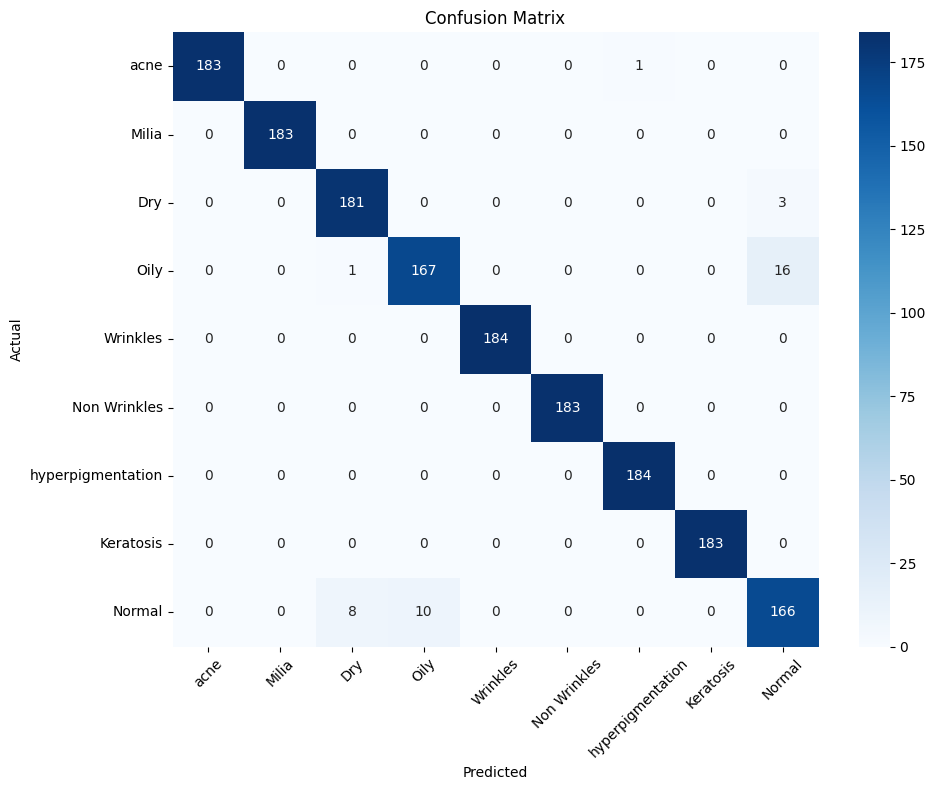

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predicted_classes, labels=list(range(len(categories))))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=categories, yticklabels=categories, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


52/52 [==============================] - 23s 446ms/step


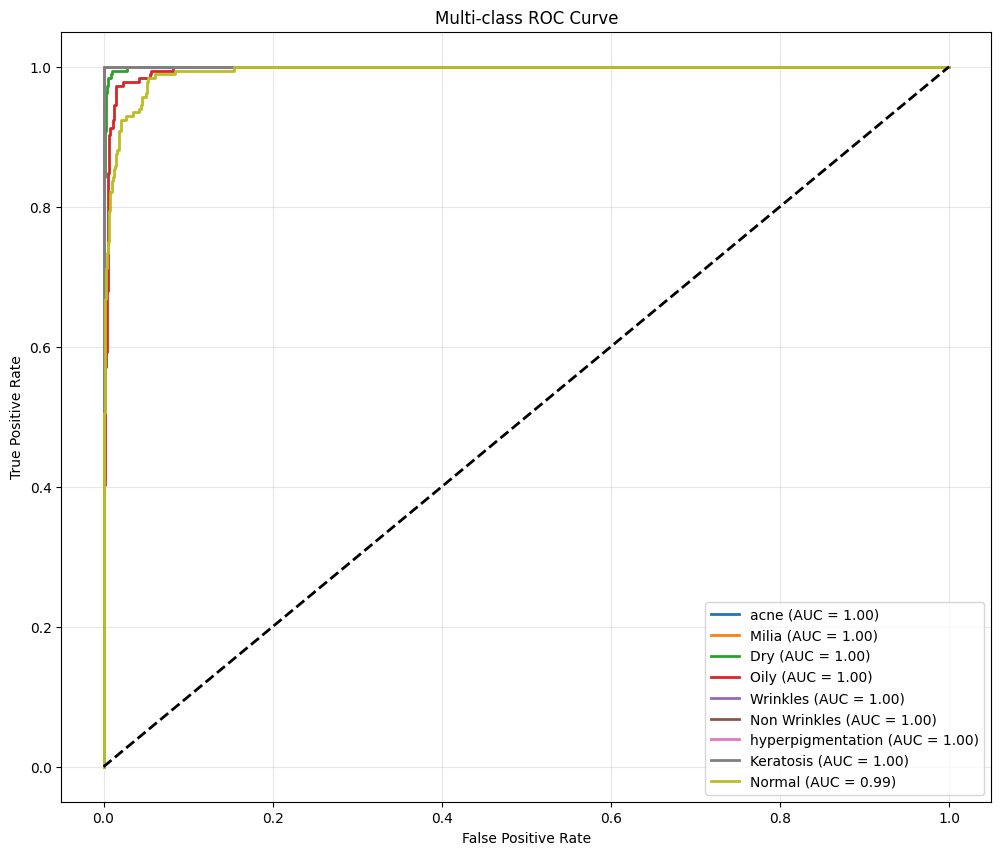

Average ROC-AUC score (macro-average): 1.00


In [21]:
# Binarize labels for multi-class ROC-AUC
num_classes = len(categories)
y_test_bin = label_binarize(y_test, classes=range(num_classes))

# Get predicted probabilities using softmax on logits
predictions = vit_model.predict(X_test_processed).logits
y_pred_prob = tf.nn.softmax(predictions, axis=1).numpy()

# Calculate ROC-AUC for each class
roc_auc_dict = {}
fpr = dict()
tpr = dict()

plt.figure(figsize=(12, 10))

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{categories[i]} (AUC = {roc_auc_dict[i]:.2f})')

# Plot diagonal line (random guessing)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

plt.show()

# Calculate and print average ROC-AUC
roc_auc_avg = roc_auc_score(y_test_bin, y_pred_prob, average='macro')
print(f"Average ROC-AUC score (macro-average): {roc_auc_avg:.2f}")

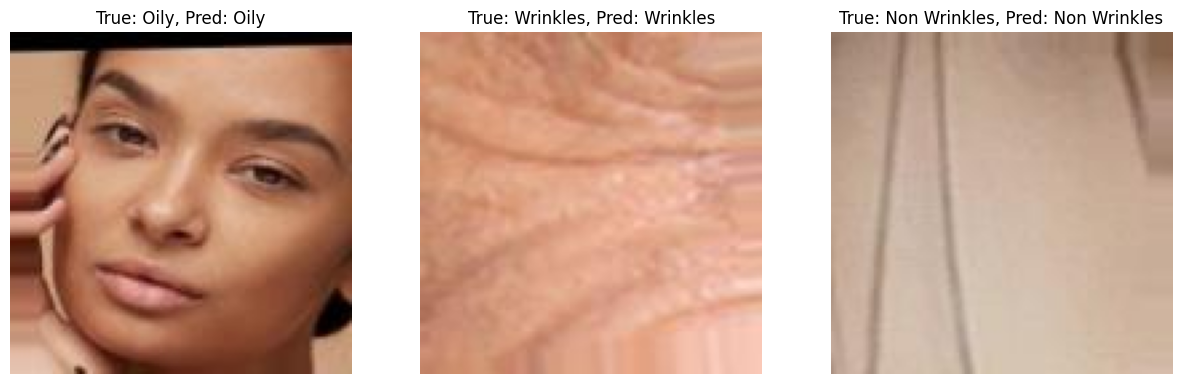

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    idx = random.randint(0, len(X_test)-1)  # Random sample from test set.
    axs[i].imshow(X_test[idx])  # Display original image.
    axs[i].axis('off')
    pred_label = categories[predicted_classes[idx]]  # Predicted category.
    true_label = categories[y_test[idx]]  # True category.
    axs[i].set_title(f"True: {true_label}, Pred: {pred_label}")  # Display prediction vs true label.

plt.show()  # Show the visualization.

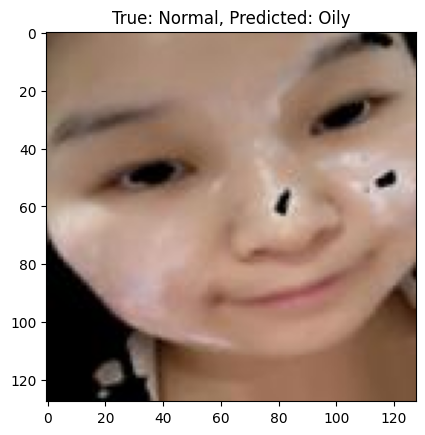

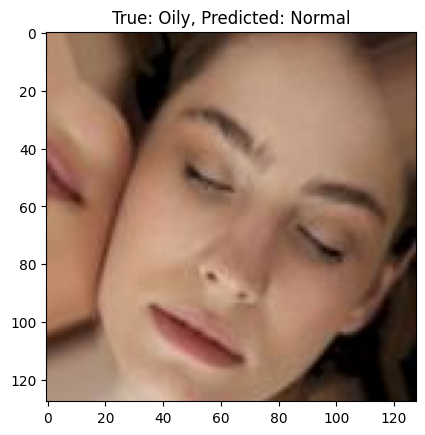

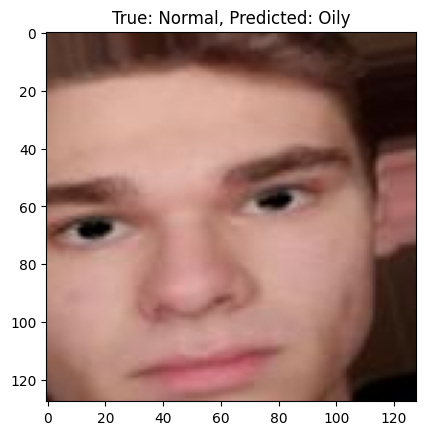

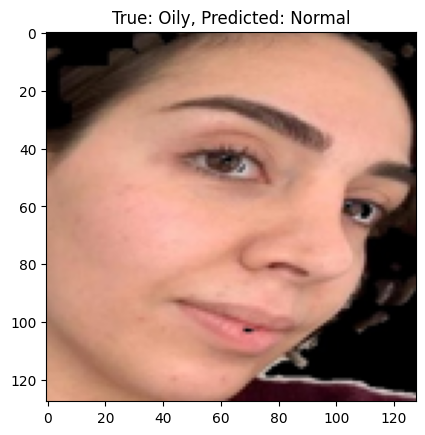

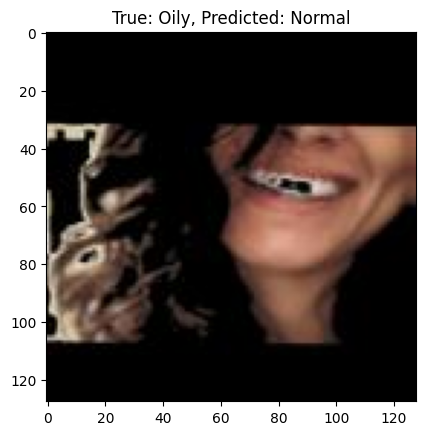

In [23]:
#error analysis
incorrect = np.where(predicted_classes != y_test)[0]

for idx in incorrect[:5]:  # Visualize first 5 incorrect predictions
    plt.imshow(X_test[idx])
    plt.title(f'True: {categories[y_test[idx]]}, Predicted: {categories[predicted_classes[idx]]}')
    plt.show()

All model checkpoint layers were used when initializing TFViTForImageClassification.

All the layers of TFViTForImageClassification were initialized from the model checkpoint at /content/drive/MyDrive/saved_vit_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTForImageClassification for predictions without further training.


52/52 [==============================] - 24s 405ms/step


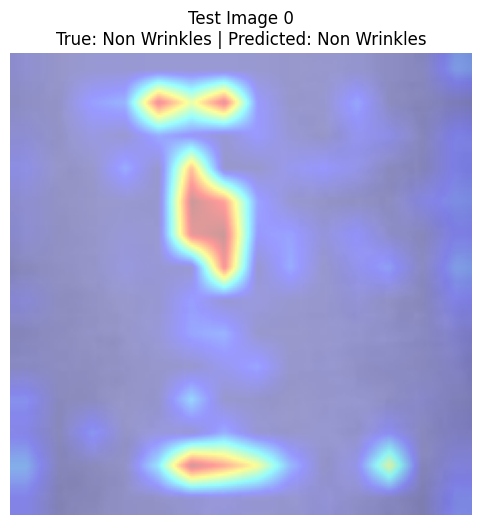

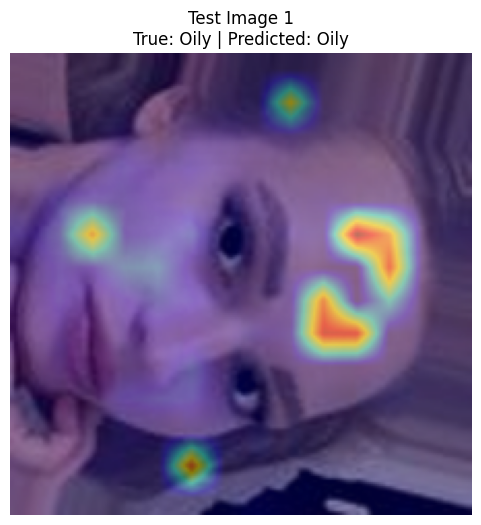

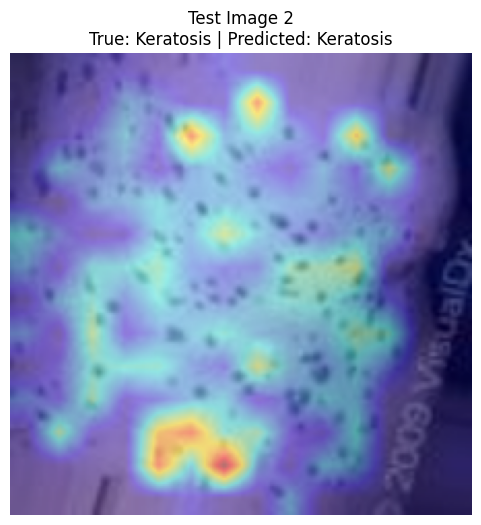

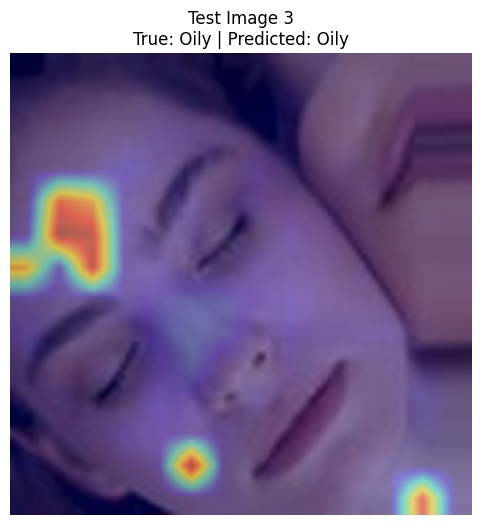

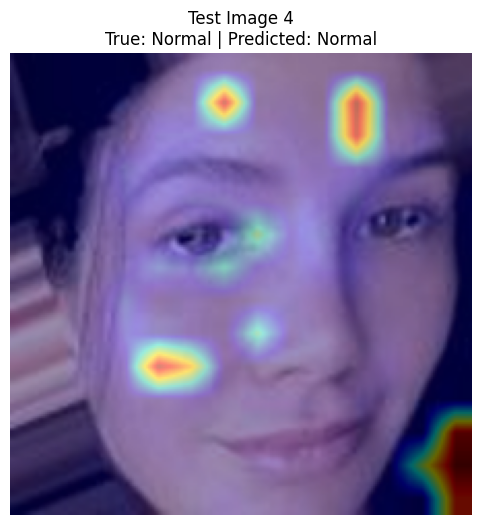

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import tensorflow as tf
from transformers import ViTFeatureExtractor, TFViTForImageClassification

# --- Load your model and feature extractor ---
model_path = '/content/drive/MyDrive/saved_vit_model'  # adjust if needed
vit_model = TFViTForImageClassification.from_pretrained(model_path)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_path)

# --- Define the attention visualization function ---
def show_vit_attention_overlay(model, feature_extractor, image_np, true_label=None, predicted_label=None, title='ViT Attention'):
    # Resize to 224x224 (ViT input size)
    image_resized = Image.fromarray(image_np).resize((224, 224))
    image_np_resized = np.array(image_resized)

    # Preprocess input
    inputs = feature_extractor(images=[image_np_resized], return_tensors='tf')
    outputs = model(**inputs, output_attentions=True)
    attn = outputs.attentions[-1][0]  # last layer, batch dim removed

    # Attention from CLS token to patches
    cls_attn = attn[:, 0, 1:]  # [heads, patches]
    avg_attn = tf.reduce_mean(cls_attn, axis=0).numpy()
    attn_map = avg_attn.reshape(14, 14)

    # Resize attention map
    attn_map_resized = cv2.resize(attn_map, (224, 224))
    attn_map_norm = (attn_map_resized - np.min(attn_map_resized)) / (np.max(attn_map_resized) - np.min(attn_map_resized))

    # Create heatmap
    heatmap = cv2.applyColorMap(np.uint8(255 * attn_map_norm), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Overlay heatmap on original image
    overlay = cv2.addWeighted(image_np_resized, 0.6, heatmap, 0.4, 0)

    # Build title
    full_title = title
    if true_label is not None and predicted_label is not None:
        full_title += f"\nTrue: {true_label} | Predicted: {predicted_label}"

    # Show image
    plt.figure(figsize=(6, 6))
    plt.imshow(overlay)
    plt.title(full_title)
    plt.axis('off')
    plt.show()

# --- Generate predictions and visualize ---
# Preprocess X_test if you haven't already
X_test_processed = preprocess_in_batches(X_test, batch_size=32)  # use your function
predictions = vit_model.predict(X_test_processed).logits
predicted_classes = np.argmax(predictions, axis=1)

# --- Show attention overlays for first N test images ---
N = 5  # Change to any number of samples you want to visualize
for i in range(N):
    true_label = categories[y_test[i]]
    pred_label = categories[predicted_classes[i]]
    show_vit_attention_overlay(vit_model, feature_extractor, X_test[i], true_label, pred_label, title=f"Test Image {i}")
